In [70]:
#all required libraries and functions
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [71]:
#extracting dataset from csv file
df=pd.read_csv('rawData.csv')


<h1>EDA</h1>

In [72]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5888 entries, 0 to 5887
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       5888 non-null   float64
 1   y       5888 non-null   float64
dtypes: float64(2)
memory usage: 92.1 KB
None


In [73]:
print(df.head())
print(f"mean is:\n{df.mean()}")
print(f"median is:\n{df.median()}")

          x         y
0 -0.034746 -0.015372
1 -0.033810  0.030544
2 -0.024949  0.003859
3 -0.017736  0.048668
4 -0.012581  0.067264
mean is:
x    3964.973236
y    1259.602697
dtype: float64
median is:
x    9.893295
y    2.488709
dtype: float64


<h3>Difference in mean and median shows presence of outliers</h3>

In [74]:
df.describe()

,x,y
count,5.888000e+03,5.888000e+03
mean,3.964973e+03,1.259603e+03
std,3.736887e+05,3.906619e+05
min,-4.950070e+06,-4.696962e+06
25%,3.858569e+00,1.111098e+00
50%,9.893295e+00,2.488709e+00
75%,1.338706e+01,4.095702e+00
max,4.879621e+06,4.582979e+06


In [75]:
print(df.duplicated().sum()) #checking for duplicated values

0


<Axes: >

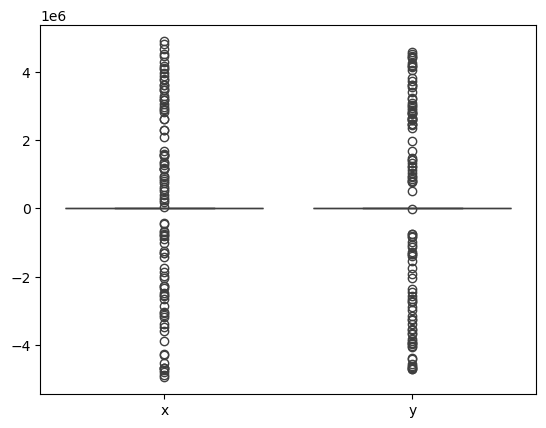

In [76]:
sns.boxplot(df)

<h3>boxplot shows presence of outliers,from the plot we can see the minimum value nd maximum value is far from the 25th nd 75th quartile respectively by a very huge difference</h3>
<h4>The data points from 25th to 75th quartile lies in range of [1,4] for x and [1,4.2] for y</h4>
<h4>whereas rest of data points lies in ranges of -5000000 and 5000000</h4>

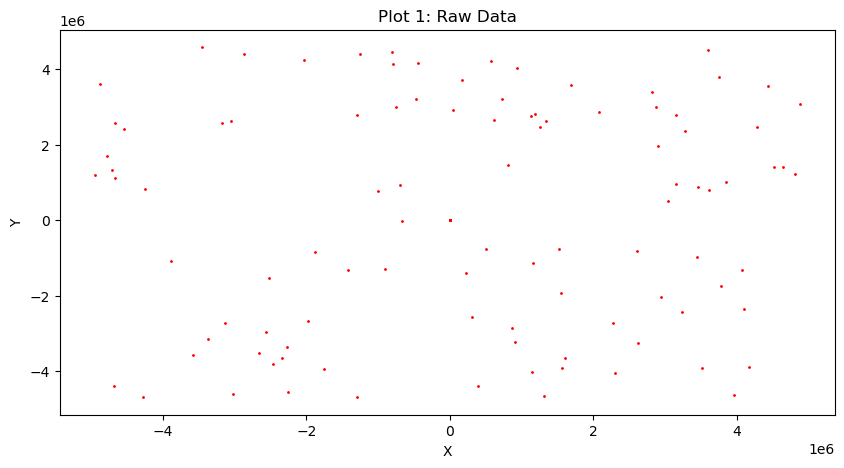

In [77]:
#Visualize Raw Data
plt.figure(figsize=(10, 5))
plt.scatter(df['x'], df['y'], s=1, c='red')
plt.title("Plot 1: Raw Data")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

<h3> Outlier removal
using Inter Quantile Range(IQR)</h3>
<h5>Taking q1 and q3 as 25th and 75th respectively</h5>

In [78]:
Q1 = df.quantile(0.25) # Lower 25%
Q3 = df.quantile(0.75) # Upper 75%
IQR = Q3 - Q1
df_clean = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [79]:
df_clean.describe()

,x,y
count,5788.000000,5788.000000
mean,9.049724,2.562240
std,5.643752,1.646827
min,-0.049207,-0.054310
25%,3.891494,1.128286
50%,9.875339,2.484978
75%,13.316841,4.072479
max,18.514079,5.056848


<Axes: >

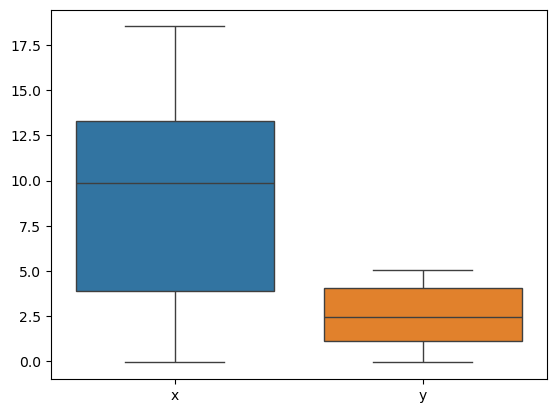

In [80]:
sns.boxplot(df_clean)

<h4>outliers removed and data is cleaner,next step is to normalize them to range of (0,1)</h4>
<h4>normalization using min max scaler</h4>

In [81]:
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_clean), columns=['x', 'y'])


<Axes: >

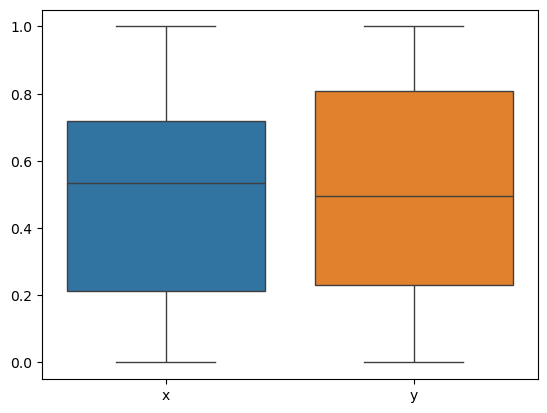

In [82]:
sns.boxplot(df_normalized)

In [83]:
#final visualization(after preprocessing)

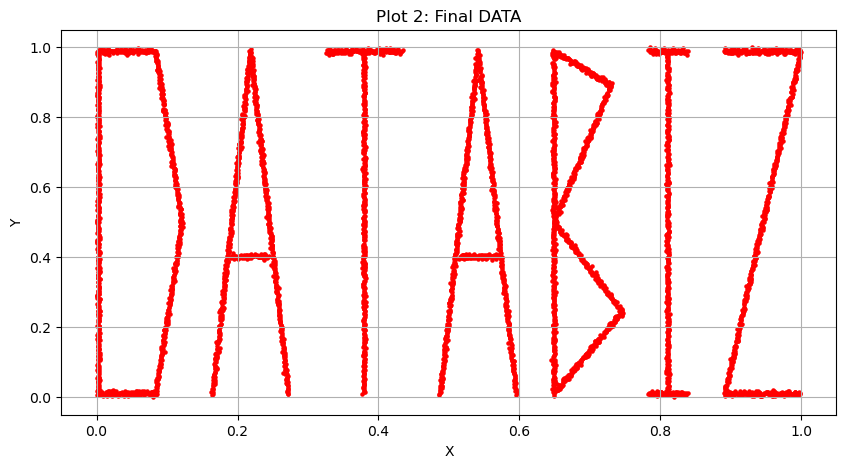

In [84]:
plt.figure(figsize=(10, 5))
plt.scatter(df_normalized['x'], df_normalized['y'], s=5, c='red')
plt.title("Plot 2: Final DATA")
plt.xlabel("X")
plt.ylabel("Y")
plt.grid(True)
plt.show()

<h2>OBTAINED CODEWORD:
DATABIZ</h2>